In [ ]:
# House Price Prediction with Multiple Linear Regression

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('train (1).csv')


In [ ]:
#Exploratory Data Analysis(EDA)

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df["SalePrice"].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


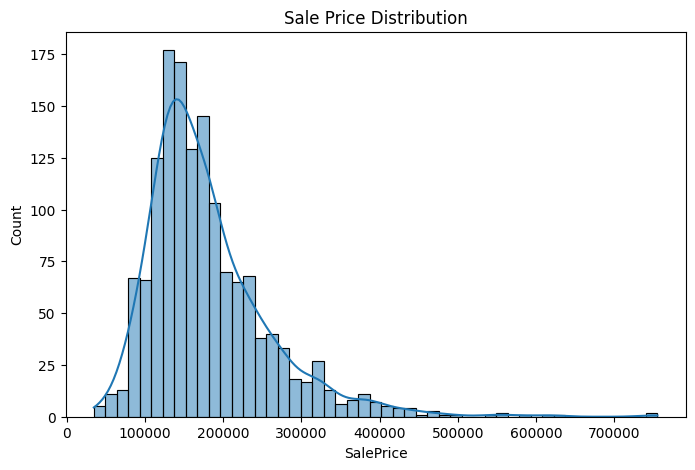

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Sale Price Distribution")
plt.show()

In [9]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [10]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
df.select_dtypes(include=["object"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
df["SalePrice_log"]=np.log(df["SalePrice"])

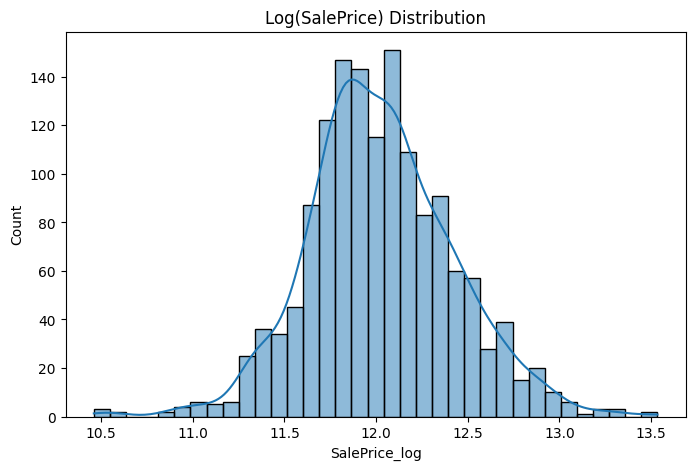

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice_log"], kde=True)
plt.title("Log(SalePrice) Distribution")
plt.show()

In [ ]:
#Missing Value Analysis

In [48]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
Electrical,1
Id,0
MSZoning,0
LotFrontage,0
LotArea,0
MSSubClass,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


In [15]:
drop_cols=["PoolQC","MiscFeature","Alley","Fence"]
df.drop(columns=drop_cols, inplace=True)

In [16]:
df.shape

(1460, 78)

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216


In [20]:
none_fill_cols = [
    "MasVnrType", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"
]

for col in none_fill_cols:
    df[col] = df[col].fillna("None")


In [21]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [29]:
X = df.select_dtypes(include=["int64","float64"]).drop(
    columns=["SalePrice", "SalePrice_log"]
)
y = df["SalePrice_log"]


In [ ]:
#Baseline Model (Numerical Features)

In [30]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [31]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)

r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")

R2 Score: 0.8764147710002019
RMSE: 0.15186399964153482


In [35]:
#Baseline model results:
#- R²: 0.876
#- RMSE (log-scale): 0.152

#This model was built using numerical features only.
#Categorical variables and feature engineering have not been applied at this stage.


In [ ]:
#Categorical Features Experiment

In [36]:
# Selected categorical features that have strong impact on house prices
categorical_features = ["Neighborhood", "ExterQual", "KitchenQual"]

In [38]:
df[categorical_features].isnull().sum()

,0
Neighborhood,0
ExterQual,0
KitchenQual,0


In [39]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [40]:
df_encoded.shape

(1460, 105)

In [41]:
df_encoded.columns[-10:]

Index(['Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [43]:
X_categorical=df_encoded.select_dtypes(include=["int64","float64"]).drop(columns=["SalePrice","SalePrice_log"])
y_categorical=df_encoded["SalePrice_log"]

In [45]:
X_train_cat,X_test_cat,y_train_cat,y_test_cat=train_test_split(X_categorical,y_categorical, test_size=0.2, random_state=42)

In [46]:
model_cat=LinearRegression()
model_cat.fit(X_train_cat,y_train_cat)

LinearRegression()

In [47]:
y_pred_cat=model_cat.predict(X_test_cat)

r2_cat=r2_score(y_test_cat,y_pred_cat)
rmse_cat=np.sqrt(mean_squared_error(y_test_cat,y_pred_cat))

print("Caegorical Features Model")
print(f"R2 Score: {r2_cat}")
print(f"RMSE: {rmse_cat}")

Caegorical Features Model
R2 Score: 0.8764147710002019
RMSE: 0.15186399964153482


In [ ]:
# Conclusion
#This project demonstrates that numerical features alone provide a strong baseline for house price prediction.
#Adding selected categorical variables did not improve model performance, highlighting the importance of baseline evaluation.
